# Global climate models 
Global Climate Models (GCMs) are crucial tools for understanding and predicting the impacts of climate change on various systems. Several sources provide GCM-based projections, each with unique characteristics suited to different scales and regions. For assessing climate impacts in South Florida, it is essential to consider sources that can provide high-resolution data for local dynamics. 


##### CMIP6-based Multi-model Hydroclimate Projection over the Conterminous US, Version 1.1

This dataset presents a suite of high-resolution downscaled hydro-climate projections over the conterminous United States (CONUS) based on multiple selected Global Climate Models (GCMs) from the Coupled Models Intercomparison Project phase 6 (CMIP6). The CMIP6 GCMs are downscaled using either statistical (DBCCA) or dynamical (RegCM) downscaling approaches based on two meteorological reference datasets (Daymet and Livneh). Subsequently, the downscaled precipitation, temperature, and wind speed are employed to drive two calibrated hydrologic models (VIC and PRMS), enabling the simulation of projected future hydrologic responses across the CONUS. Each ensemble member covers the 1980-2019 baseline and 2020-2059 near-future periods under the high-end (SSP585) emission scenario. Moreover, utilizing only DBCCA and Daymet, the projections are further extended to the 2060-2099 far-future period and across three additional emission scenarios (SSP370, SSP245, and SSP126). This dataset is formulated to support the SECURE Water Act Section 9505 Assessment for the US Department of Energy (DOE) Water Power Technologies Office (WPTO). For further details on this dataset, please refer to Kao et al. (2022) and Rastogi et al. (2022)

The data can be accessed at: 
https://hydrosource.ornl.gov/data/datasets/9505v3_1/ory.

##### Visualization of Baseline and Near-Future Precipitation, Tmax. Tmin Projections for Soth Florida

This script generates precipitation, Tmax and Tmin maps using data from multiple climate models under different time periods and scenarios which is sourced from CONUS. The maps cover South Florida's geographical region and display total annual precipitation, mean Tmax and Tmin for two distinct periods: 1980-2019 (baseline) and 2020-2059 (near-future). The data is extracted from NetCDF files for six different global climate models (GCMs) under the SSP5-8.5 scenario. Each model is visualized in a subplot, with common color scales applied to facilitate comparison. A single color bar is added to represent each variable, and the figure is saved as a high-resolution image for each variable. 

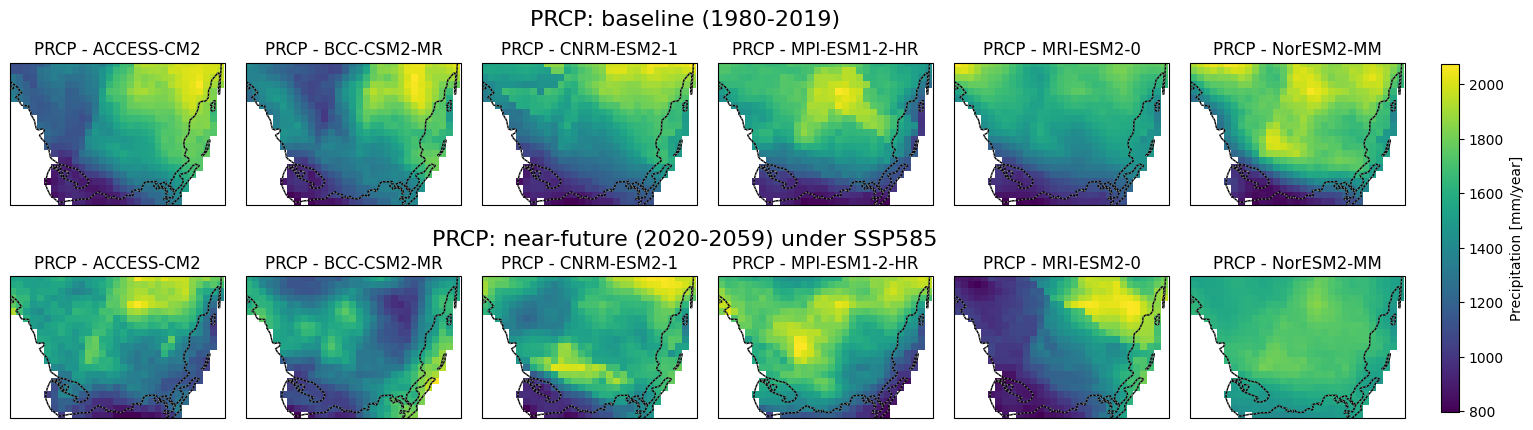

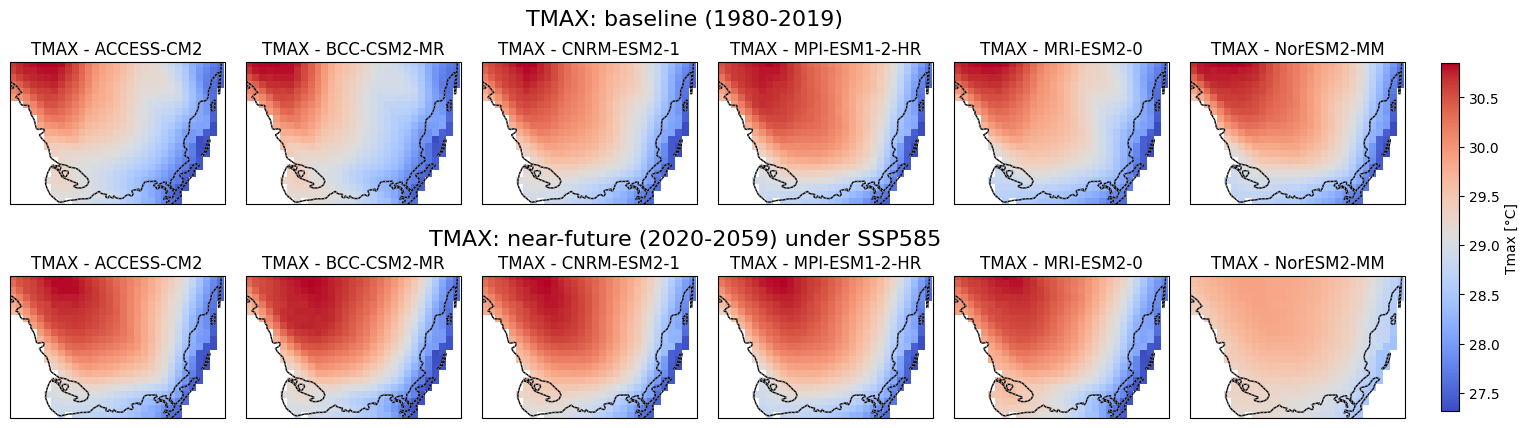

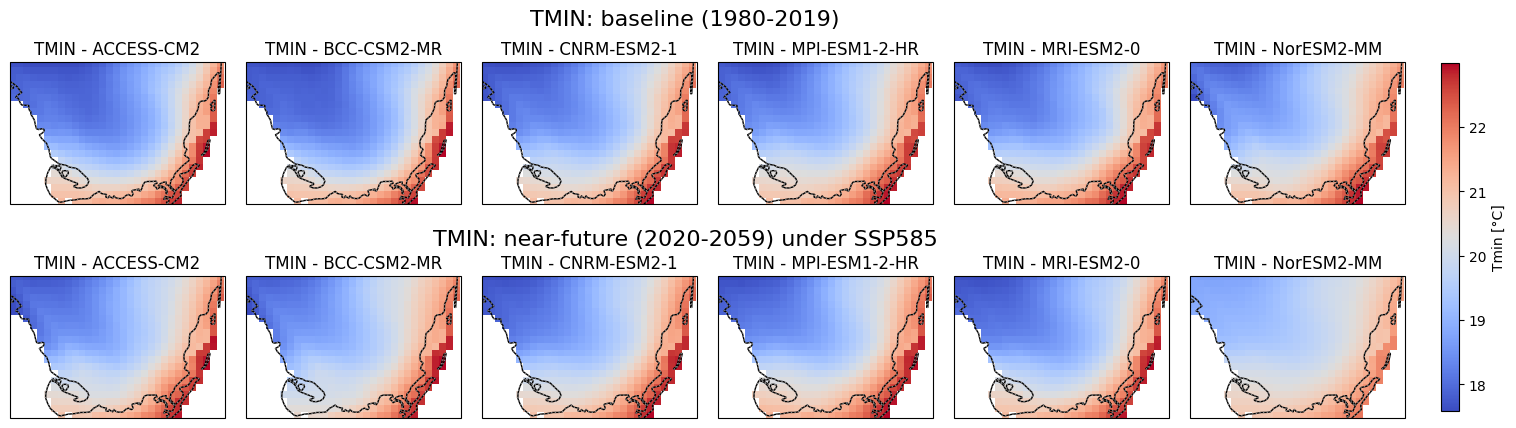

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define Florida's bounding box
florida_bounds = {
    'lon_min': -81.39207,
    'lon_max': -80.09851,
    'lat_min': 25.10831,
    'lat_max': 25.96406
}
#upper_left  -81.39207 25.96406
#upper_right -80.09851 25.96406
#lower_right -80.09851 25.10831 
#lower_left  -81.39207 25.10831 

# PC, Tmax, and Tmin variables setup (common code block)
variables = ['prcp', 'tmax', 'tmin']  # List of variables to loop over

# Define the model names
model_names = [
    'ACCESS-CM2', 'BCC-CSM2-MR', 'CNRM-ESM2-1', 
    'MPI-ESM1-2-HR', 'MRI-ESM2-0', 'NorESM2-MM',
    'ACCESS-CM2', 'BCC-CSM2-MR', 'CNRM-ESM2-1',
    'MPI-ESM1-2-HR', 'MRI-ESM2-0', 'NorESM2-MM'
]

# Units setup based on variables
units = {
    'prcp': 'Precipitation [mm/year]',
    'tmax': 'Tmax [°C]',
    'tmin': 'Tmin [°C]'
}

for variable in variables:
    # Paths to the NetCDF files based on variable
    file_paths = [ 
        f'PCP/ACCESS-CM2_ssp585_r1i1p1f1_RegCM_Daymet_VIC4_{variable}_yr_1980_2019.nc',
        f'PCP/BCC-CSM2-MR_ssp585_r1i1p1f1_RegCM_Daymet_VIC4_{variable}_yr_1980_2019.nc',
        f'PCP/CNRM-ESM2-1_ssp585_r1i1p1f2_RegCM_Daymet_VIC4_{variable}_yr_1980_2019.nc',
        f'PCP/MPI-ESM1-2-HR_ssp585_r1i1p1f1_RegCM_Daymet_VIC4_{variable}_yr_1980_2019.nc',
        f'PCP/MRI-ESM2-0_ssp585_r1i1p1f1_RegCM_Daymet_VIC4_{variable}_yr_1980_2019.nc',
        f'PCP/NorESM2-MM_ssp585_r1i1p1f1_RegCM_Daymet_VIC4_{variable}_yr_1980_2019.nc',
        f'PCP/ACCESS-CM2_ssp585_r1i1p1f1_RegCM_Daymet_VIC4_{variable}_yr_2020_2059.nc',
        f'PCP/BCC-CSM2-MR_ssp585_r1i1p1f1_RegCM_Daymet_VIC4_{variable}_yr_2020_2059.nc',
        f'PCP/CNRM-ESM2-1_ssp585_r1i1p1f2_RegCM_Daymet_VIC4_{variable}_yr_2020_2059.nc',
        f'PCP/MPI-ESM1-2-HR_ssp585_r1i1p1f1_RegCM_Daymet_VIC4_{variable}_yr_2020_2059.nc',
        f'PCP/MRI-ESM2-0_ssp585_r1i1p1f1_RegCM_Daymet_VIC4_{variable}_yr_2020_2059.nc',
        f'PCP/NorESM2-MM_ssp585_r1i1p1f1_RegCM_Daymet_VIC4_{variable}_yr_2020_2059.nc'
    ]

    # Set up plotting grid
    fig, axes = plt.subplots(2, 6, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    axes = axes.flatten()

    data_ranges = []  # To determine min and max across all data

    for idx, file_path in enumerate(file_paths):
        # Open dataset and select the data slice
        ds = xr.open_dataset(file_path, decode_times=False)
        data_slice = ds[variable].sel(
            lon=slice(florida_bounds['lon_min'], florida_bounds['lon_max']),
            lat=slice(florida_bounds['lat_min'], florida_bounds['lat_max'])
        ).isel(time=0)  # Select first time step
        data_ranges.append((float(data_slice.min()), float(data_slice.max())))

        # Plot the data slice
        im = axes[idx].pcolormesh(
            data_slice['lon'], data_slice['lat'], data_slice,
            cmap='viridis' if variable == 'prcp' else 'coolwarm', shading='auto', transform=ccrs.PlateCarree()
        )
        axes[idx].coastlines()
        axes[idx].add_feature(cfeature.BORDERS, linestyle=':')
        axes[idx].add_feature(cfeature.STATES, linestyle=':', edgecolor='gray')
        axes[idx].set_extent([florida_bounds['lon_min'], florida_bounds['lon_max'],
                              florida_bounds['lat_min'], florida_bounds['lat_max']], crs=ccrs.PlateCarree())
        axes[idx].set_title(f'{variable.upper()} - {model_names[idx]}')

        # Close dataset
        ds.close()

    # Determine common color scale based on combined data range
    vmin = min(r[0] for r in data_ranges)
    vmax = max(r[1] for r in data_ranges)

    # Re-scale all plots to common color range
    for ax in axes:
        if ax.collections:  # Ensure the axis has a plot
            im.set_clim(vmin, vmax)

    # Add a single color bar with adjusted fraction and pad
    cax = fig.add_axes([0.92, 0.28, 0.01, 0.58])  # Adjust the position and size of the colorbar
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    cbar.set_label(f"{units[variable]}")  # Update the label based on your datasets' units

    # Add common titles for the first six and next six figures
    fig.suptitle(f'{variable.upper()}: baseline (1980-2019)', fontsize=16, y=0.95)
    fig.text(0.5, 0.55, f'{variable.upper()}: near-future (2020-2059) under SSP585', ha='center', va='bottom', fontsize=16)

    # Adjust spacing to narrow the distance between the rows and columns
    plt.subplots_adjust(hspace=0.3, wspace=0.1, bottom=0.25)

    # Save the figure
    plt.savefig(f'{variable.upper()}_Baseline_Near-Future_{variable.upper()}.png', dpi=300, bbox_inches='tight')

    # Display the plot
    plt.show()
